In [1]:
%matplotlib inline

In [3]:
from galsize_models.measurements import tabulate_sdss_size_vs_stellar_mass
tabulate_sdss_size_vs_stellar_mass()

from galsize_models.measurements import load_sdss_size_vs_stellar_mass
result = load_sdss_size_vs_stellar_mass('.')
logsm_bins, mean_size_all, mean_size_q, mean_size_sf, mean_size_gv = result
logsm_mids = 0.5*(logsm_bins[:-1] + logsm_bins[1:])

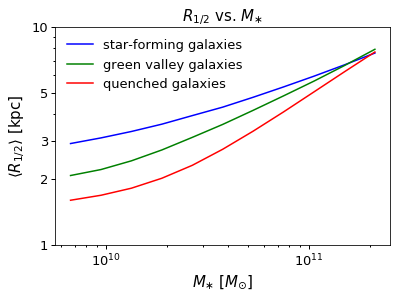

In [23]:
ax.set_xticks((100, 200, 300, 500))
xlim = ax.set_xlim(100, 1000)

from matplotlib import ticker
from scipy.signal import savgol_filter

fig, ax = plt.subplots(1, 1)
ax.loglog()

sm_mids = 10**logsm_mids
# __=ax.plot(sm_mids, mean_size_all, color='k', label='All galaxies')
mean_size_sf_smooth = savgol_filter(mean_size_sf, 7, 3)
mean_size_gv_smooth = savgol_filter(mean_size_gv, 7, 3)
mean_size_q_smooth = savgol_filter(mean_size_q, 7, 3)
__=ax.plot(sm_mids, mean_size_sf_smooth, color='blue', label='star-forming galaxies')
__=ax.plot(sm_mids, mean_size_gv_smooth, color='green', label='green valley galaxies')
__=ax.plot(sm_mids, mean_size_q_smooth, color='red', label='quenched galaxies')

legend = ax.legend()

ylim = ax.set_ylim(1, 10)
__=ax.get_yaxis().set_major_formatter(ticker.ScalarFormatter())
__=ax.get_yaxis().set_minor_formatter(ticker.NullFormatter())
__=ax.set_yticks((1, 2, 3, 5, 10))

title = ax.set_title(r'$R_{1/2}$ vs. $M_{\ast}$')
xlabel = ax.set_xlabel(r'$M_{\ast}$ [$M_{\odot}$]')
ylabel = ax.set_ylabel(r'$\langle R_{1/2}\rangle$ [kpc]')

fig.savefig('size_vs_stellar_mass_sdss.pdf', bbox_extra_artists=[xlabel, ylabel], bbox_inches='tight')
